<a href="https://colab.research.google.com/github/kevinmcmanus/lto_utils/blob/master/lto_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LTO Utilities Library

The LTO Utilities library provides a set of useful functions for dealing with files output from the Little Thompson Observatory's radio telescope. These files, suffixed with '.lto' capture spectral information and the data processing pipeline produces them at approximately one-minute intervals throughout an observation.

For the purposes of this demo, a 24-hour drift scan observation is available in Google Cloud Storage.  Having the data in GCS complicates this demo somewhat in that the Google Colab virtual machine that is running this notebook needs to mount the GCS as a preliminary step.
The actual demonstration of obtaining and using the `lto_utils` library begins in the section entitled 'Clone the lto_utils' repo.

## Preliminaries

### References on Using Cloud Storage in Colab

These articles explain how to make Google Cloud Storage availabale within a Google Colab notebook, such as this one.

(https://medium.com/analytics-vidhya/how-to-access-files-from-google-cloud-storage-in-colab-notebooks-8edaf9e6c020)

(https://stackoverflow.com/questions/51715268/how-to-import-data-from-google-cloud-storage-to-google-colab)

(https://ostrokach.gitlab.io/post/google-colab-storage/)

### Authenticate and Mount GCS Bucket

In [ ]:
#from google.colab import auth

#auth.authenticate_user()

In [ ]:
#!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
#!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
#!apt -qq update
#!apt -qq install gcsfuse

In [ ]:
#Mount the drive
#!mkdir lto_data
#!gcsfuse --implicit-dirs --limit-bytes-per-sec -1 --limit-ops-per-sec -1 lto_data lto_data

In [ ]:
#to mount your own google drive, do this:
#from google.colab import drive
#drive.mount('/content/drive')

## Clone the lto_utils Repo

In [ ]:
#!git clone https://github.com/kevinmcmanus/lto_utils

In [ ]:
import sys
sys.path.append('lto_utils')

In [1]:
import lto_utils.lto_file as lto

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Single LTO File and Examine its Contents

In [3]:
#set the path to the object
#path = 'lto_data/2018_09_02/LTO-HI-2018-09-02-17-41-53.lto'
path = r'D:\LTO Data\2020_08_10\LTO-SRGA-2020-08-10-03-42-05.lto'
#create an LTO_File object
lto_file = lto.LTO_File(path)


`lto_file` object contains two attributes: `SpectralHeader` and `SpectralData`. Both are large data structures. The `SpectralHeader` has several subsections which are:

In [4]:
lto_file.SpectralHeader.keys()

dict_keys(['Magic', 'Observatory', 'ObsLocation', 'BeamPosition', 'ObsTime', 'Spectrum', 'RadioCalibrations', 'ProgramControl', 'SpectralCharacteristics'])

 
The subsection `SpectralCharacteristics`  contains summary information of the file. 
 This subsection is particularly useful.

In [5]:
lto_file.SpectralHeader['SpectralCharacteristics']

{'avespecpwr': 1.5711914063203291e-21,
 'varspecpwr': 5.628148505357935e-45,
 'totalpwr': 1.971688095791382e-17,
 'numspecpwr': 12549,
 'numave': 26230,
 'numbad': 14,
 'aveindvpwr': 0.0018558488227427006,
 'varindvpwr': 2.780355390363809e-10,
 'peakpwr': 2.159561784222817e-21,
 'peakpwrfreq': 1420344655.25,
 'totalHIpwr': 1.2758551309050083e-18,
 'numHIpwr': 701,
 'avecrpwr': 1.5564674060608382e-21,
 'varcrpwr': 2.6875262475391685e-46,
 'numcrpwr': 11848,
 'avetsky': 112.73451232910156,
 'vartsky': 1.4098939634178782,
 'peaktsky': 156.41647768708123,
 'peaktskyfreq': 1420344655.25,
 'avefluxden': 23105.755327199975,
 'varfluxden': 1217160.0997105653,
 'peakfluxden': 31758.260641893266,
 'peakfluxfreq': 1420344655.25,
 'badspec': False,
 'processing': 'Raw FFT',
 'user': ''}

`SpectralData` is a  dictionary which essentially captures the spectrum and some other frequency-dependent measures.  Each dictionary element is a vector of length `nfft`.

In [6]:
lto_file.SpectralData.keys()

dict_keys(['dopfreq', 'rawavepwr', 'rawvarpwr', 'calavepwr', 'flatten', 'tsky', 'fluxden', 'badline', 'HIline'])

In [7]:
#type and length of the tsky member of the dictionary
n = len(lto_file.SpectralData['tsky'])
type(lto_file.SpectralData['tsky']), f'Length: {n}'

(numpy.ndarray, 'Length: 16385')

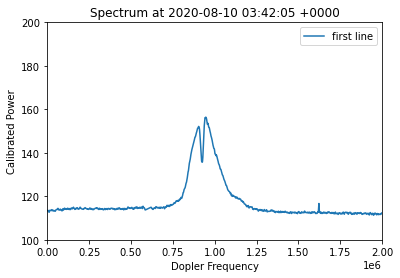

In [9]:
plt.plot(lto_file.SpectralData['dopfreq'], lto_file.SpectralData['tsky'], label = 'first line')
#plt.plot(lto_file.SpectralData['dopfreq'], lto_file.SpectralData['tsky']*1.1, label = 'second line')
plt.xlim(0, 2000000)
plt.ylim(100, 200)
plt.xlabel('Dopler Frequency')
plt.ylabel('Calibrated Power')
plt.legend()
zz=plt.title('Spectrum at '+lto_file.get_time().strftime('%Y-%m-%d %H:%M:%S %z'))

Sometimes it's easier to work with a `Pandas` dataframe. The `LTO_File` class provides a method to do so.

In [14]:
import pandas as pd
pd_df = lto_file.to_pandas()
print(len(pd_df))
pd_df.head()

16385


,ts,ra,dec,dopfreq,rawavepwr,rawvarpwr,calavepwr,flatten,tsky,fluxden,badline,HIline
0,2020-08-10 03:42:05+00:00,17.972969,-25.800467,-5000000.0,0.001856,2.780355e-10,1.571254e-21,0.000000,113.805519,23106.679688,True,False
1,2020-08-10 03:42:05+00:00,17.972969,-25.800467,-4999389.5,0.001856,2.780355e-10,1.571254e-21,0.000000,113.805519,23106.679688,True,False
2,2020-08-10 03:42:05+00:00,17.972969,-25.800467,-4998779.5,0.132688,1.772982e-02,2.297536e-20,44.365669,1664.099487,337873.000000,True,False
3,2020-08-10 03:42:05+00:00,17.972969,-25.800467,-4998169.0,0.073398,5.441707e-03,3.429081e-20,24.306440,2483.674072,504276.562500,True,False
4,2020-08-10 03:42:05+00:00,17.972969,-25.800467,-4997558.5,0.050191,2.509560e-03,3.850476e-20,16.588919,2788.889648,566246.500000,True,False


In [100]:
#testing locating variables of interest
#only want rows where HI line = true b/c no need to look for peaks elsewhere

print(pd_df.loc[pd_df['HIline'] == True])

                             ts         ra        dec       dopfreq  \
9426  2020-08-10 03:42:05+00:00  17.972969 -25.800467  7.531738e+05   
9427  2020-08-10 03:42:05+00:00  17.972969 -25.800467  7.537842e+05   
9428  2020-08-10 03:42:05+00:00  17.972969 -25.800467  7.543945e+05   
9429  2020-08-10 03:42:05+00:00  17.972969 -25.800467  7.550049e+05   
9430  2020-08-10 03:42:05+00:00  17.972969 -25.800467  7.556152e+05   
...                         ...        ...        ...           ...   
10122 2020-08-10 03:42:05+00:00  17.972969 -25.800467  1.177978e+06   
10123 2020-08-10 03:42:05+00:00  17.972969 -25.800467  1.178589e+06   
10124 2020-08-10 03:42:05+00:00  17.972969 -25.800467  1.179199e+06   
10125 2020-08-10 03:42:05+00:00  17.972969 -25.800467  1.179810e+06   
10849 2020-08-10 03:42:05+00:00  17.972969 -25.800467  1.621704e+06   

       rawavepwr  rawvarpwr     calavepwr   flatten        tsky       fluxden  \
9426    0.001902   0.000004  1.607286e-21  0.569538  116.415260  2

In [98]:
#calculating running slope between datapoints

for index in range(len(pd_df) -2):
    if (pd_df.loc[index, 'HIline']):
        slope = (pd_df['tsky'][index + 1] - pd_df['tsky'][index] ) / (pd_df['dopfreq'][index + 1] - pd_df['dopfreq'][index])
        pd_df.at[index, 'slope'] = slope * 10000
        print(pd_df.loc[index, ['tsky', 'dopfreq', 'slope']])

tsky        116.415
dopfreq      753174
slope      0.722347
Name: 9426, dtype: object
tsky        116.459
dopfreq      753784
slope      0.934685
Name: 9427, dtype: object
tsky       116.516
dopfreq     754394
slope       1.3432
Name: 9428, dtype: object
tsky       116.598
dopfreq     755005
slope      1.81443
Name: 9429, dtype: object
tsky       116.709
dopfreq     755615
slope      2.10313
Name: 9430, dtype: object
tsky       116.837
dopfreq     756226
slope       2.0188
Name: 9431, dtype: object
tsky       116.961
dopfreq     756836
slope      1.52269
Name: 9432, dtype: object
tsky        117.054
dopfreq      757446
slope      0.738922
Name: 9433, dtype: object
tsky        117.099
dopfreq      758057
slope     -0.077247
Name: 9434, dtype: object
tsky        117.094
dopfreq      758667
slope     -0.655225
Name: 9435, dtype: object
tsky        117.054
dopfreq      759277
slope     -0.888057
Name: 9436, dtype: object
tsky            117
dopfreq      759888
slope     -0.902715
Name: 943

Name: 9690, dtype: object
tsky       144.678
dopfreq     914917
slope     -13.8545
Name: 9691, dtype: object
tsky       143.832
dopfreq     915527
slope     -13.9884
Name: 9692, dtype: object
tsky       142.978
dopfreq     916138
slope     -13.7155
Name: 9693, dtype: object
tsky       142.141
dopfreq     916748
slope     -13.7254
Name: 9694, dtype: object
tsky       141.304
dopfreq     917358
slope     -14.3852
Name: 9695, dtype: object
tsky       140.426
dopfreq     917969
slope     -15.2107
Name: 9696, dtype: object
tsky       139.497
dopfreq     918579
slope     -15.1695
Name: 9697, dtype: object
tsky       138.571
dopfreq     919189
slope     -13.6365
Name: 9698, dtype: object
tsky       137.739
dopfreq     919800
slope      -10.987
Name: 9699, dtype: object
tsky       137.068
dopfreq     920410
slope     -8.14219
Name: 9700, dtype: object
tsky       136.571
dopfreq     921020
slope     -5.74778
Name: 9701, dtype: object
tsky       136.221
dopfreq     921631
slope     -3.85375
Name

In [141]:
#smoothing slope to help get locate only true peaks

def smoothPascal(dataframe, centerIndex, column):
    pascalArray = np.array([1,6,15,20,15,6,1])
    #print(pascalArray)
    sum = 0
    for i in range(-3, 3):
        sum += (dataframe.at[(centerIndex + i), column]) * (pascalArray[3 + i])
        #print(sum)
        
    final = sum/64.0
   # if final < 0.2 and final > -0.2:
       # final = 0.0
        
    return final
        
    

In [145]:
#for index in range (9526, 10840):
for index in range(2, len(pd_df)-3):
    
    if (pd_df.loc[index, 'HIline']):
        
        smoothSlope = smoothPascal(pd_df, index, 'slope')
        pd_df.loc[index, ['smooth_slope']] = smoothSlope
        #print(pd_df.loc[index, ['tsky', 'HIline', 'slope', 'smooth_slope']])
      
        #use slope to identify peaks/valleys 
        lastSlopeDiff = (pd_df.at[index-2, 'smooth_slope'] - pd_df.at[index -1, 'smooth_slope'])
        nextSlopeDiff = (pd_df.at[index+2, 'smooth_slope'] - pd_df.at[index +1, 'smooth_slope'])
        #nextSlope= pd_df.at[index+1, 'smooth_slope']
        
        #between neg slope increasing and pos slope decreasing and close to zero (one ish)
        #slopes before are decreasing in magnitude and after are increasing
        magDecrease = abs(pd_df.at[index -2, 'smooth_slope']) > abs(pd_df.at[index -1, 'smooth_slope']) and abs(pd_df.at[index -1, 'smooth_slope']) > abs(pd_df.at[index, 'smooth_slope'])
        magIncrease = abs(pd_df.at[index +2,'smooth_slope']) > abs(pd_df.at[index +1, 'smooth_slope']) and abs(pd_df.at[index +1, 'smooth_slope']) > abs(pd_df.at[index, 'smooth_slope'])
        
        
        pd_df.at[index, 'isPeak'] = False
        pd_df.at[index, 'isValley'] = False
        
       # if abs(smoothSlope) < 0.4 and lastSlopeDiff > 0 and nextSlopeDiff < 0:
        #if abs(smoothSlope) < 0.4 and magDecrease == True and magIncrease == True and (pd_df.at[index -1, 'smooth_slope'] > 0):
        if max(pd_df.loc[index - 20: index + 20, 'tsky']) == pd_df.at[index, 'tsky']:
            pd_df.at[index, 'isPeak'] = True

       # elif abs(smoothSlope) < 0.4 and lastSlopeDiff < 0 and nextSlopeDiff > 0:
        elif min(pd_df.loc[index - 20: index + 20, 'tsky']) == pd_df.at[index, 'tsky']:
            pd_df.at[index, 'isValley'] = True
        
        #print all rows where peak or valley == true
        #print (pd_df.loc[index, ['isPeak', 'isValley']])
print(pd_df.loc[pd_df['isPeak'] == True])
print(pd_df.loc[pd_df['isValley'] == True])

                            ts         ra        dec      dopfreq  rawavepwr  \
9673 2020-08-10 03:42:05+00:00  17.972969 -25.800467  903930.6875   0.002487   
9743 2020-08-10 03:42:05+00:00  17.972969 -25.800467  946655.2500   0.002551   

      rawvarpwr     calavepwr   flatten        tsky       fluxden  badline  \
9673   0.000006  2.100402e-21  0.566375  152.131516  30888.259766    False   
9743   0.000006  2.159562e-21  0.567042  156.416473  31758.261719    False   

      HIline     slope  smooth_slope isPeak isValley  
9673    True -0.114007     -0.181927   True    False  
9743    True -1.135956     -0.747984   True    False  
                            ts         ra        dec   dopfreq  rawavepwr  \
9708 2020-08-10 03:42:05+00:00  17.972969 -25.800467  925293.0   0.002195   

      rawvarpwr     calavepwr   flatten        tsky       fluxden  badline  \
9708   0.000005  1.873298e-21  0.566708  135.682495  27548.505859    False   

      HIline     slope  smooth_slope isPeak isV

In [149]:
for index, peak in enumerate(peakArray):
    x1, y1 = peak[0, 'dopfreq'], peak[0, 'dopfreq']
    xValley, yValley = valley[dopfreq], valley ['tsky']
    m = ((peak[1]['tsky']- peak[2]['tsky'])/(peak[1]['dopfreq']- peak[2]['dopfreq']))
    estimatedPower = m(xValley - x1) + y1
    print(estimatedPower - yValley)

ts
ra
dec
dopfreq
rawavepwr
rawvarpwr
calavepwr
flatten
tsky
fluxden
badline
HIline
slope
smooth_slope
isPeak
isValley


**TODO:** check out the ra and dec columns above

##Read All LTO Files in a Directory

`lto_utils` provides functionality to read all `.lto` in a directory. This can useful in summarizing an observing session, such as a drift scan.

**Caution:** the methods below will read **all** `.lto` files in the specified directory, so if there are files with duplicate content or `.lto` files from other observing sessions, such files will contaminate the results.

In [ ]:
# see the directories of observations:
!ls lto_data

These are early observations in the LTO Radio Telescope projects. As such, the quality of the data is suspect; however the observations will suffice for demonstration purposes.  Just don't base any science on these!!

The 2018_08_30 directory is a 24-hour drift scan, some 1440 files (one for each minute) in all.  The 2018_09_02 observation set is considerably smaller, so we'll demonstrate with it.  Doing so, however will compromise the plots that follow.

If you want to see a full 24-hour drift scan, set the scan date to `'2018_08_30'`.

In [ ]:
#obs_dir = '/Users/kevin/Documents/LTO Radiometry/HI_Detection/lto_cache'
#obs_dir = 'lto_data'
obs_dir = 'D:\LTO Data'
scan_date = '2020_08_13'

In [ ]:
#get all the spectral characteristics for the observation of 2018_09_02
# this can take a several minutes to run, espcially if the files are not local
obs_summary = lto.getSpectralCharacteristics(obs_dir+ '/' +scan_date)

In [ ]:
obs_summary.head()

In [ ]:
len(obs_summary)

In [ ]:
plt.plot(obs_summary.index, obs_summary.avetsky)
plt.title(f'Drift Scan Summary, Scan Date: {scan_date}')
plt.xlabel('Time (UT)')
plt.xticks(rotation=90)
plt.ylabel('Average Sky Temp (K)')

In [ ]:
#it's a drift scan so plot by right ascension
plt.scatter(obs_summary.ra, obs_summary.avetsky, s=9)
plt.title(f'Drift Scan Summary, Scan Date: {scan_date}')
plt.xlabel('Right Ascension (deg)')
plt.xticks(rotation=90)
plt.ylabel('Average Sky Temp (K)')
plt.grid()
plt.gca().invert_xaxis()

In [ ]:
#this takes quite a bit of time on goolge, not so much when data is local

#get all the spectral data from the drift scan
#spectra = lto.getDriftScan(obs_dir+ '/' +scan_date)

In [ ]:
spectra.head()

Yeilds a rather large data frame:

In [ ]:
len(spectra)

## Construct a Spectrogram

The `spectra` data frame from above can be unweildy with 23 million rows, so the `getDriftScan` method provides a `dfclip` parameter to eliminate data at the far ends of the spectrum. If we clip the spectrum, the production of the spectrogram proceeds much faster, because the resulting data set is so much smaller.

In [ ]:
#clip to -300 kHz to 300 kHz
spectra = lto.getDriftScan(obs_dir+ '/' +scan_date, dfclip=(0, 0.2e7))
len(spectra)

In [ ]:
#make the temperature array dopfreq x time

#sort the spectra data frame
spectra.sort_values(['dopfreq', 'ts'], inplace=True)

#get the y axis (dopler freq) values:
dopfreqs = spectra.dopfreq.unique()

# next, get the x-axis which is the time of the observations;
obs_times = spectra.ts.unique()

#make the temperature array
skytemp = np.array(spectra.tsky).reshape(len(dopfreqs), len(obs_times))

skytemp.shape

In [ ]:
#helper routine to beautify the time formating:
import matplotlib.dates as mdates
fmt = mdates.DateFormatter('%H:%M')

#for the normalizer:
import matplotlib.colors as colors



In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

pcm = ax.pcolormesh(obs_times, dopfreqs, skytemp,cmap='gnuplot',
                norm=colors.LogNorm())
                   #norm=colors.PowerNorm(gamma=1./2.))
fig.colorbar(pcm, label='Sky Temp (K)')

plt.xlabel('Time (UT)')
plt.gca().xaxis.set_major_formatter(fmt)
plt.xticks(rotation=90)
plt.ylabel('Dopler Shift (kHz)')
plt.title(f'LTO Driftscan of {scan_date}',fontdict={'fontsize':16, 'fontweight':'bold'})
plt.grid()